In [1]:
try:
    import torch
    import torchvision
    from torchvision import transforms, datasets
    from torchvision import DataLoader
    from torch import nn
except:
    print(f"[INFO] Couldn't find torch and torchvision. Installing both...")
    !pip install torch
    !pip install torchvision
    import torch
    import torchvision
    from torchvision import transforms, datasets
    from torch.utils.data import DataLoader
    from torch import nn
    print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

[INFO] Couldn't find torch and torchvision. Installing both...
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.wh

In [2]:
# Setup training data
train_data = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=transforms.ToTensor(),
    target_transform=None
)

# Setup testing data
test_data = datasets.CIFAR10(
    root="data",
    train=False,
    download=True,
    transform=transforms.ToTensor()
)

100%|██████████| 170498071/170498071 [00:05<00:00, 29442790.30it/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


In [3]:
# Show the first training sample
image, label = train_data[0]
image, label

(tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
          [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
          [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
          ...,
          [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
          [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
          [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],
 
         [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
          [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
          [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
          ...,
          [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
          [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
          [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],
 
         [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
          [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
          [0.0824, 0.0000, 0.0314,  ...,

In [4]:
# Show the size of both data and targets

len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(50000, 50000, 10000, 10000)

In [5]:
class_names = train_data.classes
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [6]:
# Display the shape of the image
image.shape

torch.Size([3, 32, 32])

Image shape: torch.Size([3, 32, 32])


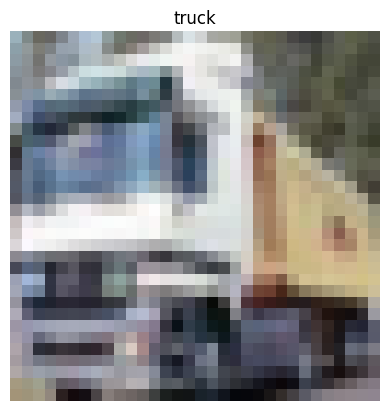

In [7]:
# Display random image from the train data
import matplotlib.pyplot as plt

image, label = train_data[1]
print(f"Image shape: {image.shape}")

plt.imshow(image.permute(1, 2, 0))
plt.title(class_names[label])
plt.axis("off")
plt.show()

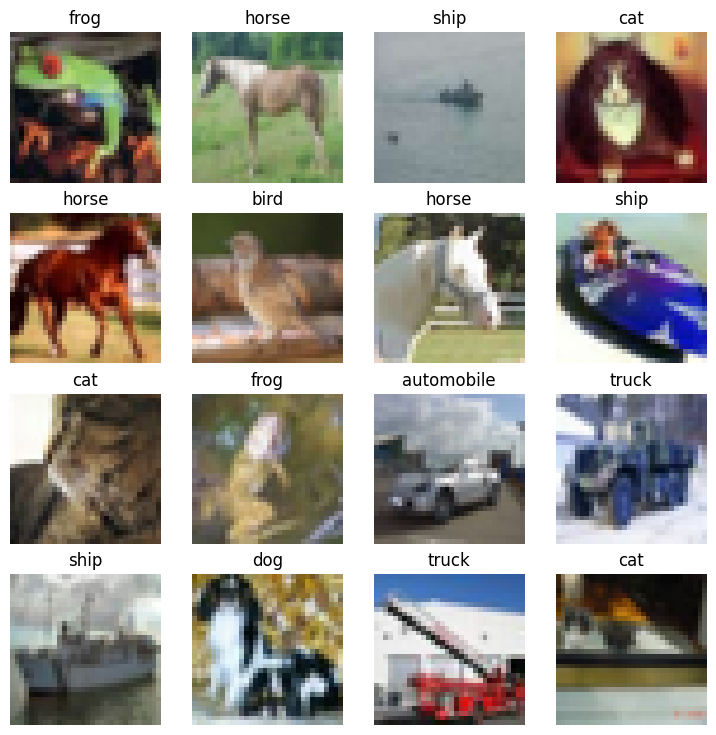

In [8]:
# Plot images
torch.manual_seed(42)

fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4

for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.permute(1, 2, 0))
    plt.title(class_names[label])
    plt.axis(False)
plt.show()

In [9]:
BATCH_SIZE = 32

train_dataloader = DataLoader(
    train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_dataloader = DataLoader(
    test_data,
    batch_size=BATCH_SIZE
)


print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Length of train dataloader: 1563 batches of 32
Length of test dataloader: 313 batches of 32


In [10]:
train_features_batch, test_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, test_labels_batch.shape

(torch.Size([32, 3, 32, 32]), torch.Size([32]))

In [11]:
from torchvision.utils import make_grid

def display_batch(dataloader: torch.utils.data.DataLoader):
    for img, label in dataloader:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(img, nrow=16).permute(1, 2, 0));
        break

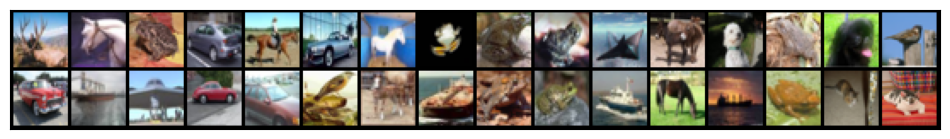

In [12]:
display_batch(train_dataloader)

In [13]:
class TinyVGG(nn.Module):
    def __init__(self, input_shape: int, output_shape: int, hidden_units: int):
        super().__init__()

        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*8*8,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        return self.classifier(self.conv_block_2(self.conv_block_1(x)))


In [14]:
device = "cuda" if torch.cuda.is_available() else "cpu"

device

'cuda'

In [15]:
torch.manual_seed(42)

model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=640, out_features=10, bias=True)
  )
)

In [16]:
img_batch, label_batch = next(iter(train_dataloader))

img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}")

model_0.eval()
with torch.inference_mode():
    pred = model_0(img_single.to(device))


print(f"Output logits: \n{pred}\n")
print(f"Output prediction probabilites:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label: \n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single image shape: torch.Size([1, 3, 32, 32])
Output logits: 
tensor([[-0.0408, -0.0499, -0.0030, -0.0058,  0.0213, -0.0228, -0.0012, -0.0404,
          0.0046, -0.0268]], device='cuda:0')

Output prediction probabilites:
tensor([[0.0976, 0.0967, 0.1013, 0.1011, 0.1038, 0.0993, 0.1015, 0.0976, 0.1021,
         0.0990]], device='cuda:0')

Output prediction label: 
tensor([4], device='cuda:0')

Actual label:
5


In [17]:
try:
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo

from torchinfo import summary
summary(model_0,
        input_size=[1, 3, 32, 32])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 10]                   --
├─Sequential: 1-1                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-1                       [1, 10, 32, 32]           280
│    └─ReLU: 2-2                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-3                       [1, 10, 32, 32]           910
│    └─ReLU: 2-4                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-5                    [1, 10, 16, 16]           --
├─Sequential: 1-2                        [1, 10, 8, 8]             --
│    └─Conv2d: 2-6                       [1, 10, 16, 16]           910
│    └─ReLU: 2-7                         [1, 10, 16, 16]           --
│    └─Conv2d: 2-8                       [1, 10, 16, 16]           910
│    └─ReLU: 2-9                         [1, 10, 16, 16]           --
│    └─MaxPool2d: 2-10                   [1, 10, 8, 8]             --
├─Sequentia

In [18]:
def train_step(model: torch.nn.Module,
          dataloader: torch.utils.data.DataLoader,
          loss_fn: torch.nn.Module,
          optimizer: torch.optim.Optimizer):

    model.train()

    train_loss, train_acc = 0, 0

    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        y_pred = model(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item() /  len(y_pred)

    train_loss /= len(dataloader)
    train_acc /= len(dataloader)
    return train_loss, train_acc

In [19]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):

    model.eval()

    test_loss, test_acc = 0, 0

    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)

            test_pred_logits = model(X)

            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item() / len(test_pred_labels))

        test_loss /= len(dataloader)
        test_acc /= len(dataloader)
        return test_loss, test_acc

In [20]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module=nn.CrossEntropyLoss(),
          epochs: int=5):

    results = {
        "train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                          dataloader=train_dataloader,
                                          loss_fn=loss_fn,
                                          optimizer=optimizer)

        test_loss, test_acc = test_step(model=model,
                                        dataloader=test_dataloader,
                                        loss_fn=loss_fn)

        print(
            f"Epoch: {epoch+1} |"
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} |"
            f"test_acc: {test_acc:.4f} |"
        )


        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)
    return results

In [21]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS = 5

model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=1e-3)

from timeit import default_timer as timer
start_timer = timer()

model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)
end_timer = timer()
print(f"Total training time: {end_timer - start_timer:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 |train_loss: 1.6800 | train_acc: 0.3917 | test_loss: 1.4297 |test_acc: 0.4800 |
Epoch: 2 |train_loss: 1.3626 | train_acc: 0.5144 | test_loss: 1.3245 |test_acc: 0.5234 |
Epoch: 3 |train_loss: 1.2584 | train_acc: 0.5525 | test_loss: 1.2318 |test_acc: 0.5617 |
Epoch: 4 |train_loss: 1.1980 | train_acc: 0.5761 | test_loss: 1.1741 |test_acc: 0.5840 |
Epoch: 5 |train_loss: 1.1499 | train_acc: 0.5958 | test_loss: 1.1895 |test_acc: 0.5798 |
Total training time: 75.200 seconds


In [22]:
model_0_results

{'train_loss': [1.6800323338822836,
  1.3626119680154498,
  1.258435309276471,
  1.197999624281607,
  1.1499193754626327],
 'train_acc': [0.3916546705054383,
  0.5143953934740882,
  0.5525231925783749,
  0.5761156429942419,
  0.5957693538067819],
 'test_loss': [1.4296686744537597,
  1.3244587919963435,
  1.2318098284185124,
  1.1741305644900655,
  1.1894837941605443],
 'test_acc': [0.48003194888178913,
  0.5233626198083067,
  0.5617012779552716,
  0.5839656549520766,
  0.5797723642172524]}

In [23]:
from typing import Dict, List

def plot_loss_curves(results: Dict[str, List[float]]):
    loss = results["train_loss"]
    test_loss = results["test_loss"]

    accuracy = results["train_loss"]
    test_accuracy = results["test_acc"]

    epochs = range(len(results["train_loss"]))

    plt.figure(figsize=(15, 7))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label="train_loss")
    plt.plot(epochs, test_loss, label="test_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label="train_accuracy")
    plt.plot(epochs, test_accuracy, label="test_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend();


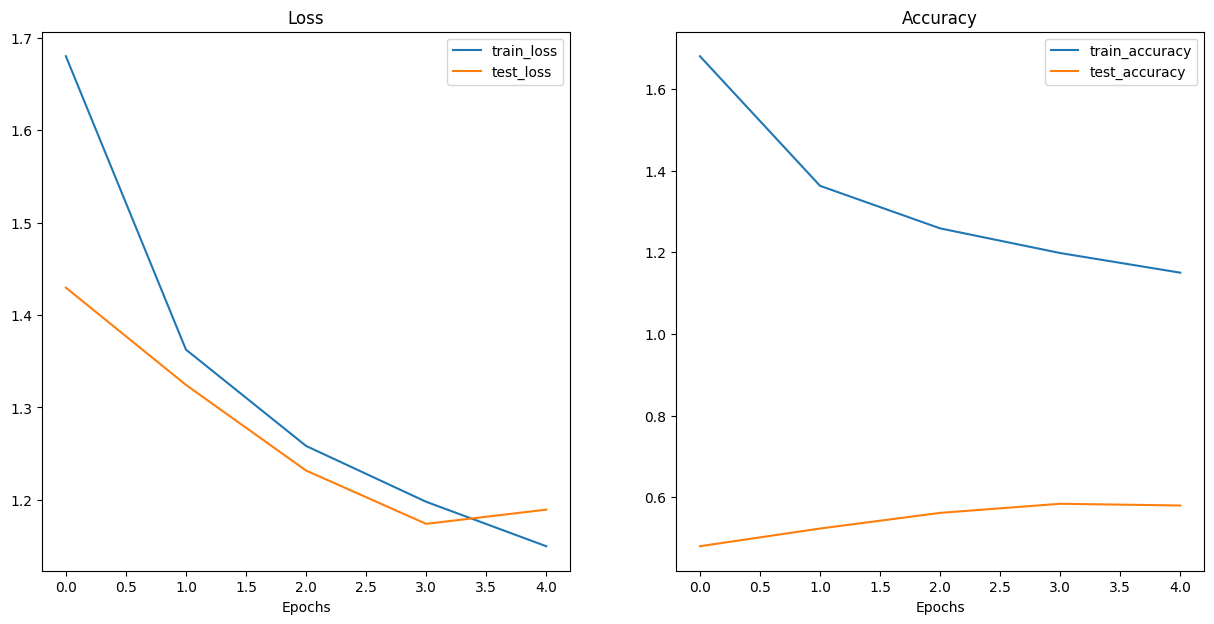

In [24]:
plot_loss_curves(model_0_results)

In [25]:
class TinyVGG_V2(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3,
                      stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3,
                      stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.conv_block_3 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3,
                      stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=256*4*4,
                      out_features=1024),
            nn.ReLU(),
            nn.Linear(in_features=1024, out_features=512),
            nn.ReLU(),
            nn.Linear(in_features=512, out_features=10)
        )

    def forward(self, x):
        return self.classifier(self.conv_block_3(self.conv_block_2(self.conv_block_1(x))))

In [26]:
model_1 = TinyVGG_V2()

model_1

TinyVGG_V2(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Lin

In [28]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_1 = TinyVGG_V2().to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(),
                             lr=1e-3)

start_time = timer()

model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

end_time = timer()
print(f"Total training time: {end_time - start_time:.3f} seconds")


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 |train_loss: 1.6393 | train_acc: 0.3881 | test_loss: 1.3035 |test_acc: 0.5234 |
Epoch: 2 |train_loss: 1.1337 | train_acc: 0.5935 | test_loss: 1.0202 |test_acc: 0.6427 |
Epoch: 3 |train_loss: 0.8987 | train_acc: 0.6836 | test_loss: 0.8907 |test_acc: 0.6908 |
Epoch: 4 |train_loss: 0.7433 | train_acc: 0.7371 | test_loss: 0.8140 |test_acc: 0.7177 |
Epoch: 5 |train_loss: 0.6163 | train_acc: 0.7828 | test_loss: 0.7883 |test_acc: 0.7369 |
Total training time: 124.613 seconds


In [30]:
model_1_results

{'train_loss': [1.639265430675282,
  1.1336525963501372,
  0.8987462632715588,
  0.7433272552505489,
  0.6163276764573153],
 'train_acc': [0.3880558221369162,
  0.5935300703774792,
  0.6835612603966731,
  0.7370841330774153,
  0.7828294945617402],
 'test_loss': [1.3034831294998193,
  1.02024259411108,
  0.8907239771308229,
  0.8139762969824452,
  0.7883262678076284],
 'test_acc': [0.5233626198083067,
  0.6426717252396166,
  0.6907947284345048,
  0.7176517571884984,
  0.7369209265175719]}

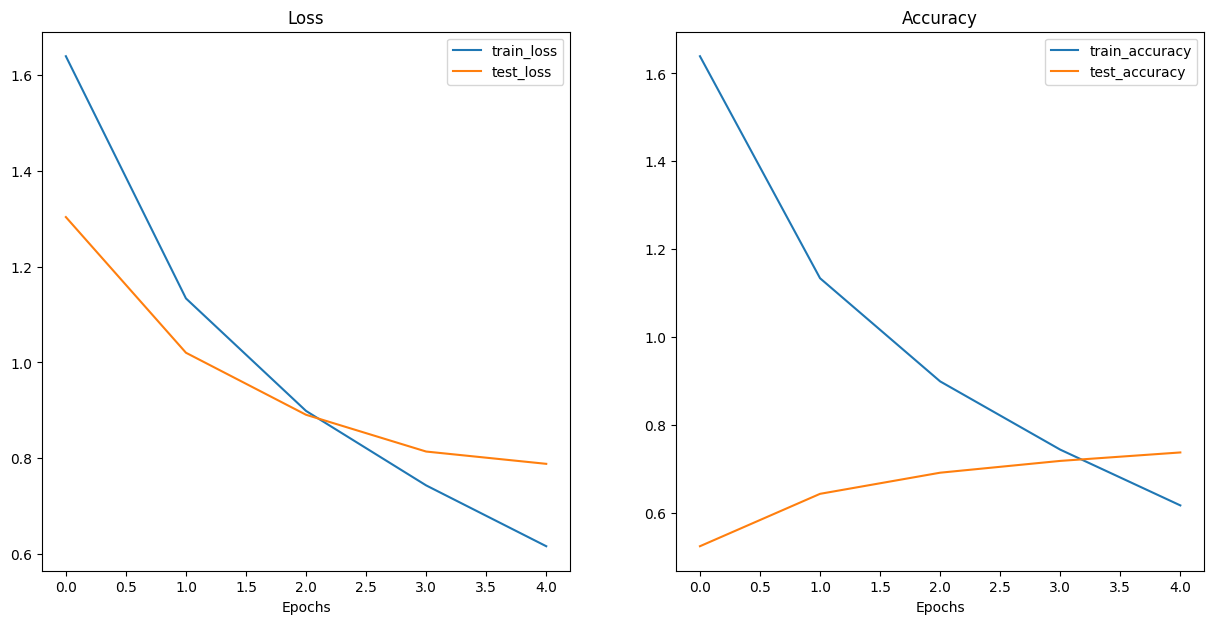

In [29]:
plot_loss_curves(model_1_results)

In [31]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)

model_0_df

,train_loss,train_acc,test_loss,test_acc
0,1.680032,0.391655,1.429669,0.480032
1,1.362612,0.514395,1.324459,0.523363
2,1.258435,0.552523,1.231810,0.561701
3,1.198000,0.576116,1.174131,0.583966
4,1.149919,0.595769,1.189484,0.579772


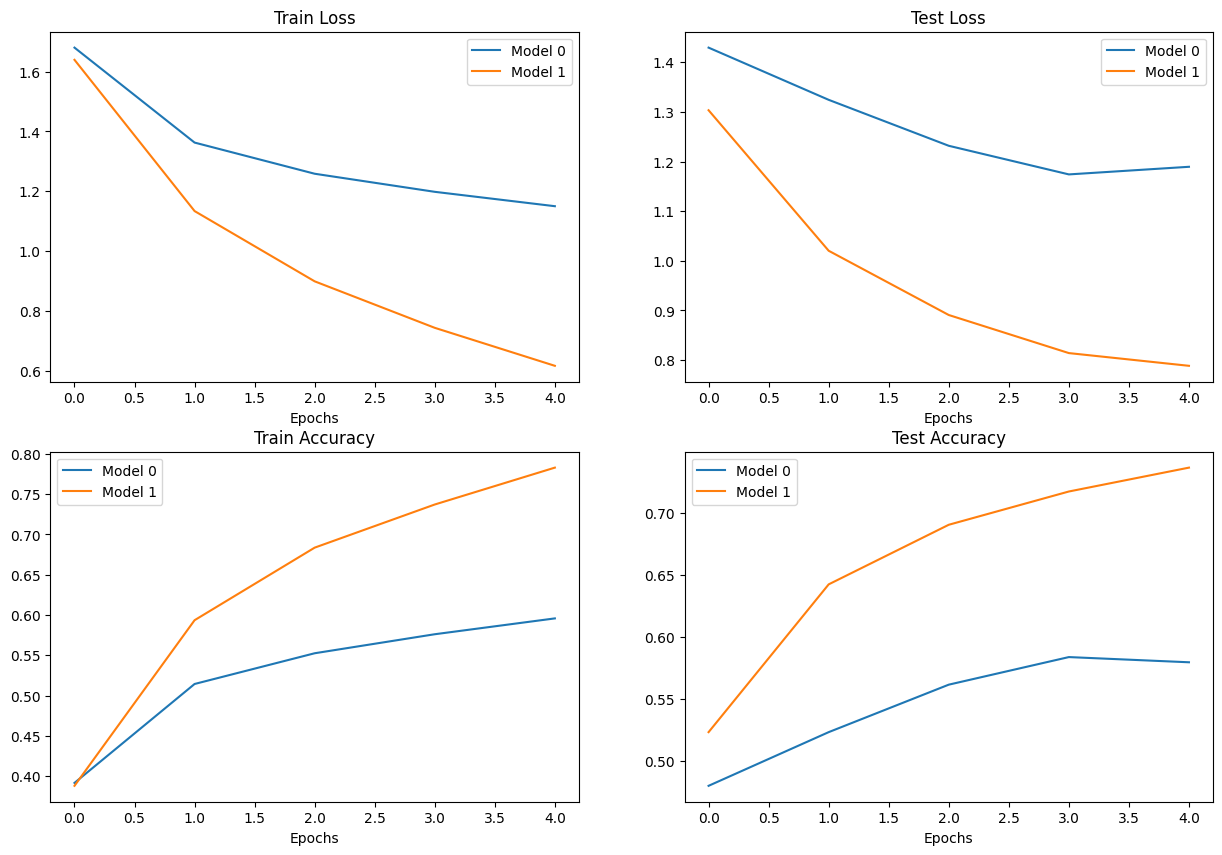

In [33]:
plt.figure(figsize=(15, 10))

epochs = range(len(model_0_df))

plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df["train_loss"], label="Model 0")
plt.plot(epochs, model_1_df["train_loss"], label="Model 1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df["test_loss"], label="Model 0")
plt.plot(epochs, model_1_df["test_loss"], label="Model 1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df["train_acc"], label="Model 0")
plt.plot(epochs, model_1_df["train_acc"], label="Model 1")
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df["test_acc"], label="Model 0")
plt.plot(epochs, model_1_df["test_acc"], label="Model 1")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.legend();

## Prediction on single Image

In [34]:
img_batch, label_batch = next(iter(train_dataloader))

img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}")

model_0.eval()
with torch.inference_mode():
    pred = model_1(img_single.to(device))


print(f"Output logits: \n{pred}\n")
print(f"Output prediction probabilites:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label: \n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single image shape: torch.Size([1, 3, 32, 32])
Output logits: 
tensor([[-8.6391, -8.6614,  0.6299,  0.7635, -2.6262,  1.2895,  6.7384, -7.5335,
         -8.2940, -6.6585]], device='cuda:0')

Output prediction probabilites:
tensor([[2.0780e-07, 2.0321e-07, 2.2036e-03, 2.5187e-03, 8.4920e-05, 4.2619e-03,
         9.9093e-01, 6.2780e-07, 2.9344e-07, 1.5059e-06]], device='cuda:0')

Output prediction label: 
tensor([6], device='cuda:0')

Actual label:
6
